In [ ]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#Print the shape 
print(train_images.shape)# 60,000 rows of 28 x 28 pixel images
print(test_images.shape) # 10,000 rows of 28 x 28 pixel images

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
"""
0 = T-shirt / Top
1=Trouser
2=Pullover
3=Dress
4=Coat
5=Sandal
6=Shirt
7=Sneaker
8=Bag
9=Ankle Boot
"""

'\n0 = T-shirt / Top\n1=Trouser\n2=Pullover\n3=Dress\n4=Coat\n5=Sandal\n6=Shirt\n7=Sneaker\n8=Bag\n9=Ankle Boot\n'

Image Label: 2


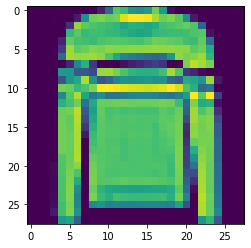

In [ ]:
#View a training image
img_index = 5 #You can update this value to look at other images
img = train_images[img_index]
print("Image Label: " + str(train_labels[img_index]))
plt.imshow(img)

In [ ]:
#Build the model
#3 layers
#1 layer to flatten the image to a 28 x 28 = 784 vector
#1 layer with 128 neurons and relu function
#1 layer with 10 neurons and softmax function
#Create the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#Compile the model
#The loss function measures how well the model did on training , and then tries 
#to improve on it using the optimizer

model.compile(
   optimizer=tf.keras.optimizers.Adam(), 
   loss='sparse_categorical_crossentropy', 
   metrics = ['accuracy'])

In [ ]:
#Train the model
model.fit(train_images, 
          train_labels,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=5, #number of iterations over the entire dataset to train on
          batch_size=60000)#number of samples per gradient update for training

Epoch 1/5
1/1 [==============================] - 1s 948ms/step - loss: 0.3459 - accuracy: 0.8744
Epoch 2/5
1/1 [==============================] - 1s 661ms/step - loss: 0.3460 - accuracy: 0.8741
Epoch 3/5
1/1 [==============================] - 1s 630ms/step - loss: 0.3459 - accuracy: 0.8741
Epoch 4/5
1/1 [==============================] - 1s 628ms/step - loss: 0.3454 - accuracy: 0.8741
Epoch 5/5
1/1 [==============================] - 1s 624ms/step - loss: 0.3444 - accuracy: 0.8745


In [ ]:
#Evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.8565


[0.4312412738800049, 0.8565000295639038]

In [ ]:
#Make a prediction
predictions = model.predict(test_images[:10000])
print(np.argmax(predictions, axis=1)) #Print the predicted labels
print(test_labels[:10000]) #Print the actual labels

313/313 [==============================] - 1s 3ms/step
[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


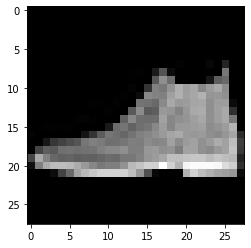

[9]
[9]


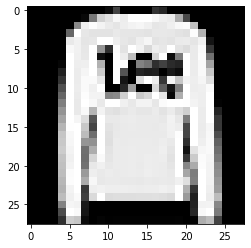

[2]
[2]


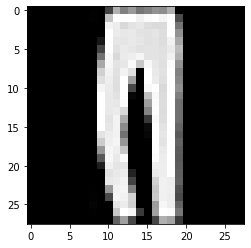

[1]
[1]


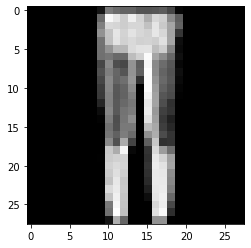

[1]
[1]


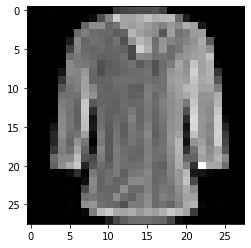

[2]
[6]


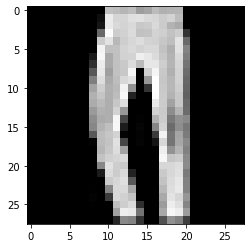

[1]
[1]


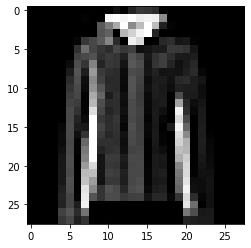

[4]
[4]


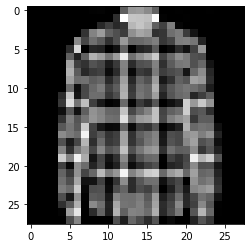

[6]
[6]


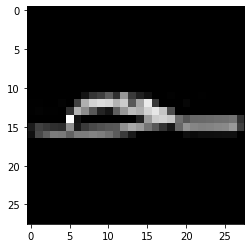

[5]
[5]


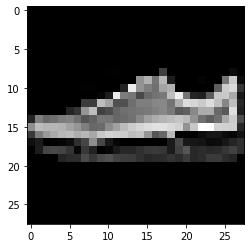

[7]
[7]


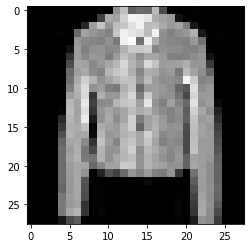

[2]
[4]


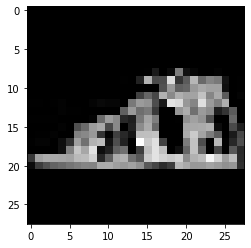

[5]
[5]


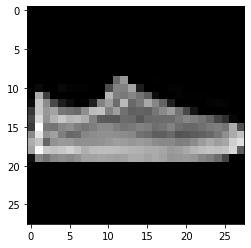

[5]
[7]


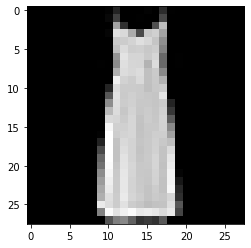

[3]
[3]


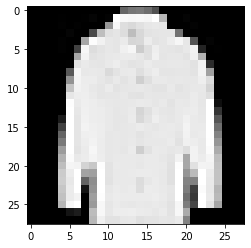

[4]
[4]


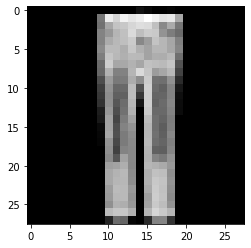

[1]
[1]


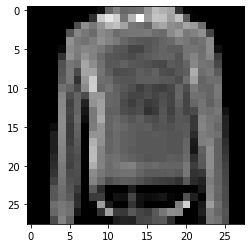

[2]
[2]


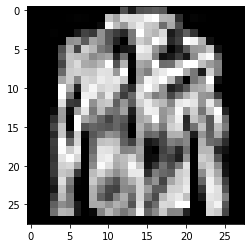

[2]
[4]


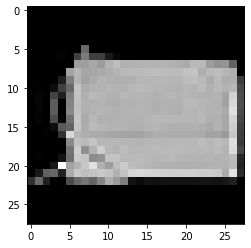

[8]
[8]


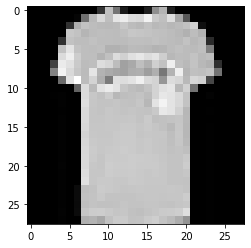

[0]
[0]


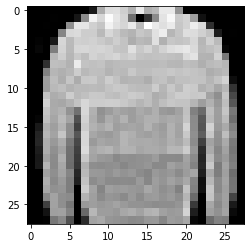

[2]
[2]


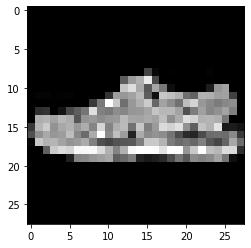

[5]
[5]


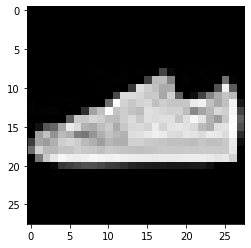

[7]
[7]


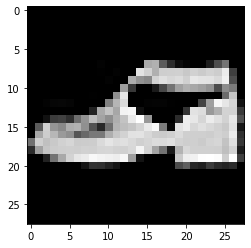

[5]
[9]


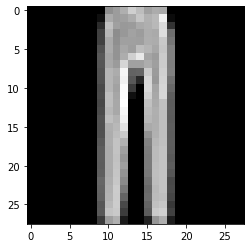

[1]
[1]


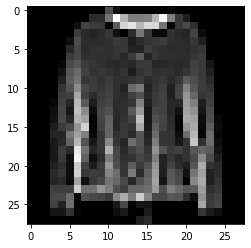

[2]
[4]


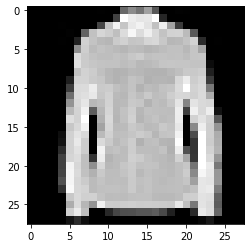

[6]
[6]


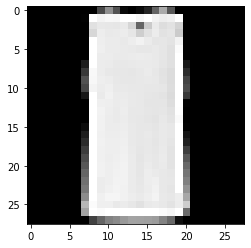

[3]
[0]


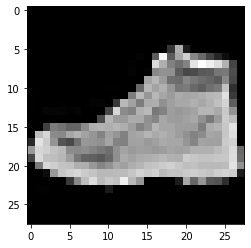

[9]
[9]


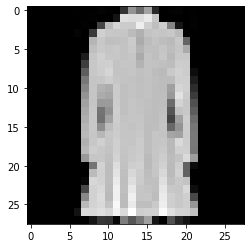

[3]
[3]


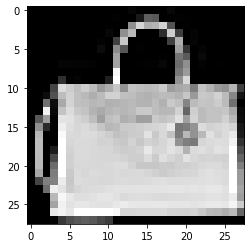

[8]
[8]


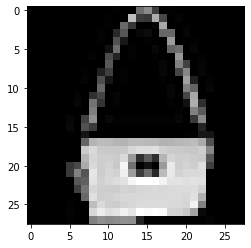

[8]
[8]


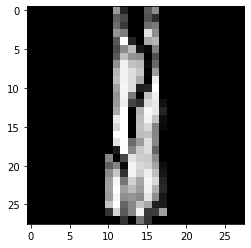

[3]
[3]


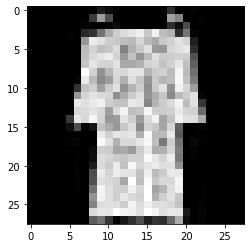

[3]
[3]


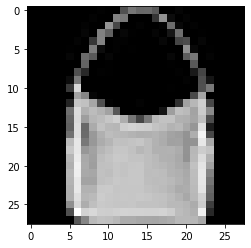

[8]
[8]


In [ ]:
for i in range(0,35):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print(np.argmax(predictions[i:i+1], axis=1)) #Print the predicted labels
  print(test_labels[i:i+1]) #Print the actual labels